# Machine Learning Algorithms

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Train RandomForest Classifier on MNIST Dataset

In [2]:
# Get the MNIST Data


from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
# Data and Label

X, y = mnist["data"], mnist["target"]

In [4]:
# Note that the label is a string. Most ML algorithms expect numbers, so let’s cast y to integer:

y = y.astype(np.uint8)

In [5]:
# Lets split the data into training and test with 60,000 images in training set and rest 10000 in test set

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
# Train the RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)

In [7]:
# Get Probabilities using cross_val_predict

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")
y_probas_forest

/Users/abhinav/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/abhinav/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/abhinav/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.1, 0. , 0.1],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.1, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.9, 0. ]])

## Train SVM Classifier on MNIST Dataset

In [8]:
# Train the Support Vector Machine classifier

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

/Users/abhinav/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
# Get the prediction for first digit

some_digit = X[0]
svm_clf.predict([some_digit])

array([5], dtype=uint8)

## Unsupervised Learning - KMeans

In [10]:
# Get the points data

pointsdf = pd.read_csv("datasets/kmeans/points.csv")

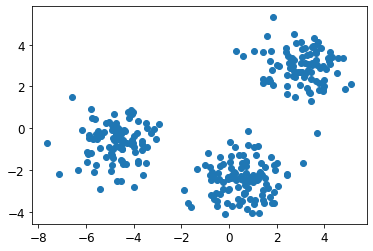

In [11]:
# Plot the points data

points = np.array(pointsdf)
xs = points[:, 0]
ys  = points[:, 1]

plt.scatter(xs, ys)

In [12]:
# Cluster using KMeans

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
t = model.fit(points)
clusters = model.fit_predict(points)

In [13]:
# Predict new points 

new_points = [[4,3],[4,1],[-5,1]]
j = model.predict(new_points)
print(j)

[0 0 1]
